In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [40]:
df=pd.read_csv('Emotion_classify_Data.csv')
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [41]:
df.shape

(5937, 2)

In [42]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [43]:
df.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


In [44]:
df.dtypes

Comment    object
Emotion    object
dtype: object

In [45]:
df.isna().sum()

Comment    0
Emotion    0
dtype: int64

<Axes: xlabel='count', ylabel='Emotion'>

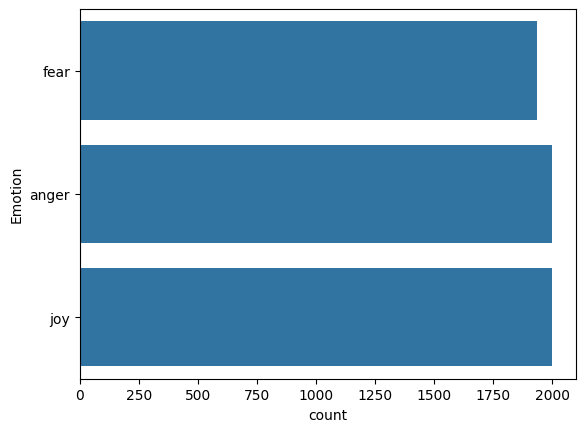

In [46]:
sns.countplot(df['Emotion'])

In [47]:
df['Emotion']=df['Emotion'].map({'fear':0,'anger':1,'joy':2})
df.dtypes

Comment    object
Emotion     int64
dtype: object

In [48]:
cmnt=df.Comment

In [49]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
cmnt=cmnt.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))


In [50]:
cmnt=cmnt.str.replace('[^a-zA-z0-9]'," ",regex=True)

In [51]:
cmnt=cmnt.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))

In [52]:
from nltk.stem import SnowballStemmer
sp=SnowballStemmer('english')
cmnt=cmnt.apply(lambda x:[sp.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))

In [53]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
cmnt=cmnt.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop ]).apply(lambda x:' '.join(x))


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data=tf.fit_transform(cmnt)

In [55]:
y=df.Emotion

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report
knn=KNeighborsClassifier()
sv=SVC()
mn=BernoulliNB()
lst=[knn,sv,mn]
for i in lst:
    print('model is',i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('accuracy score is')
    print(accuracy_score(y_test,y_pred))
    print('classification report is')
    print(classification_report(y_test,y_pred))
    print('*'*100)

model is KNeighborsClassifier()
accuracy score is
0.7699214365881033
classification report is
              precision    recall  f1-score   support

           0       0.74      0.81      0.78       614
           1       0.74      0.80      0.77       600
           2       0.85      0.69      0.76       568

    accuracy                           0.77      1782
   macro avg       0.78      0.77      0.77      1782
weighted avg       0.78      0.77      0.77      1782

****************************************************************************************************
model is SVC()
accuracy score is
0.9107744107744108
classification report is
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       614
           1       0.92      0.92      0.92       600
           2       0.86      0.96      0.91       568

    accuracy                           0.91      1782
   macro avg       0.91      0.91      0.91      1782
weighted avg       0.